<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V4_TVAE_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [ ]:
#TVAE data
df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/tvae_SDV_BreastCancer.csv")
del df['Unnamed: 0']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,9.866787,14.637137,63.409325,283.713730,0.084223,0.046159,0.016544,0.020951,0.170999,...,13.174990,18.064878,79.308249,368.916148,0.152767,0.166851,0.158809,0.035439,0.288579,0.073689
1,B,12.885053,21.506004,79.229176,336.364127,0.081238,0.061742,0.030052,0.025329,0.169469,...,15.764673,27.487070,81.358017,726.979378,0.112737,0.137944,0.120542,0.071356,0.271750,0.068861
2,B,11.165762,15.516346,84.076405,356.413321,0.112075,0.064143,0.012986,0.000000,0.159183,...,12.177383,34.227039,87.682893,644.261133,0.125459,0.256056,0.112901,0.045699,0.301039,0.055040
3,B,12.271667,19.807824,68.534578,428.143496,0.088438,0.031222,0.028840,0.018988,0.144926,...,14.332578,18.433072,68.255508,505.092414,0.092259,0.116755,0.059426,0.044334,0.235016,0.079151
4,B,7.454015,12.357933,51.167853,202.087605,0.088588,0.052791,0.051511,0.013281,0.174599,...,10.671485,18.960872,60.949763,340.397278,0.127406,0.107711,0.110993,0.000000,0.299682,0.069818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,B,11.653797,19.591590,66.871153,347.640448,0.114469,0.153040,0.098849,0.020412,0.171224,...,13.364227,31.212963,75.105110,309.445867,0.150710,0.268134,0.244718,0.056089,0.251965,0.088369
9996,B,12.779385,13.799951,71.689730,568.975097,0.102959,0.126075,0.107483,0.026956,0.176738,...,14.636441,25.387452,81.755763,675.860482,0.160312,0.562150,0.291571,0.173512,0.298970,0.102903
9997,B,12.144682,17.091324,72.648862,363.638743,0.115953,0.122028,0.112376,0.031809,0.145315,...,12.978866,21.222782,88.692189,534.210501,0.185600,0.492610,0.452870,0.090011,0.243860,0.143752
9998,B,11.440653,14.876270,83.906545,447.719512,0.101748,0.135110,0.069284,0.093306,0.198483,...,14.864455,19.688309,104.210820,711.314226,0.158937,0.555026,0.211123,0.186335,0.263381,0.072269


In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()

In [ ]:
df['diagnosis'].value_counts()

B    6166
M    3834
Name: diagnosis, dtype: int64

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
#print("validation    : ",X_val.shape[0])

Original data :  (10000, 31)
tarin         :  (8000, 30)
test          :  2000


In [ ]:
# SVM
st = time.time()
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf',probability=True)
svm.fit(X_train, y_train)
send = time.time() - st
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)

In [ ]:
#ANN
st = time.time()
tf.random.set_seed(123)
ANNmodel = Sequential()
ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
ANNmodel.add(Dense(10, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))
ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
aend = time.time() - st
ATr = ANNmodel.evaluate(X_train,y_train,verbose=0)[1]
ATe = ANNmodel.evaluate(X_test,y_test,verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")

Epoch 1/20
57/57 [==============================] - 1s 7ms/step - loss: 0.3905 - accuracy: 0.8578 - val_loss: 0.2133 - val_accuracy: 0.9413
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1752 - accuracy: 0.9357 - val_loss: 0.1415 - val_accuracy: 0.9513
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9418 - val_loss: 0.1236 - val_accuracy: 0.9525
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1294 - accuracy: 0.9450 - val_loss: 0.1176 - val_accuracy: 0.9500
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.9475 - val_loss: 0.1153 - val_accuracy: 0.9488
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.9479 - val_loss: 0.1132 - val_accuracy: 0.9525
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9499 - val_loss: 0.1120 - val_accuracy: 0.9525
Epoch 8/20
57/57 [==

In [ ]:
ATr,ATe

(0.9576249718666077, 0.9514999985694885)

In [ ]:
#XGBoost
st = time.time()
xgb = XGBClassifier(objective='binary:logistic',max_depth= 6,alpha= 50,learning_rate= 0.01,n_estimators=250)
xgb.fit(X_train, y_train)
xend = time.time() - st
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe

(0.956875, 0.941)

In [ ]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)

st = time.time()
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
kend = time.time() - st
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.9180

Number of Neighbors: 3
KNN model train accuracy score: 0.9629
KNN model test accuracy score: 0.9340

Number of Neighbors: 5
KNN model train accuracy score: 0.9549
KNN model test accuracy score: 0.9445

Number of Neighbors: 7
KNN model train accuracy score: 0.9537
KNN model test accuracy score: 0.9440

Number of Neighbors: 9
KNN model train accuracy score: 0.9523
KNN model test accuracy score: 0.9445

Number of Neighbors: 11
KNN model train accuracy score: 0.9499
KNN model test accuracy score: 0.9410

best neighbours:  5


(0.954875, 0.9445)

In [ ]:
#RF
st = time.time()
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
rend = time.time() - st
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe

(0.943875, 0.9505)

In [ ]:
#LR
st = time.time()
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
lend = time.time() - st
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe

(0.95, 0.95)

In [ ]:
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/tvae_SDV_BreastCancer.csv")
  del df['Unnamed: 0']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')

    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final

In [ ]:
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/tvae_SDV_BreastCancer.csv")
  del df['Unnamed: 0']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(10, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final

In [ ]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

Epoch 1/20
57/57 [==============================] - 1s 6ms/step - loss: 0.5787 - accuracy: 0.7063 - val_loss: 0.4691 - val_accuracy: 0.8763
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.9169 - val_loss: 0.2669 - val_accuracy: 0.9337
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9404 - val_loss: 0.1722 - val_accuracy: 0.9475
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1437 - accuracy: 0.9450 - val_loss: 0.1471 - val_accuracy: 0.9475
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.9468 - val_loss: 0.1384 - val_accuracy: 0.9463
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1234 - accuracy: 0.9492 - val_loss: 0.1330 - val_accuracy: 0.9475
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9506 - val_loss: 0.1318 - val_accuracy: 0.9488
Epoch 8/20
57/57 [==

In [ ]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [ ]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

st = time.time()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=DNNX.shape[1:]),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2)
dend = time.time() - st

Epoch 1/500
100/100 [==============================] - 2s 5ms/step - loss: 0.4793 - accuracy: 0.6833 - val_loss: 0.3532 - val_accuracy: 0.9488
Epoch 2/500
100/100 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.9480 - val_loss: 0.3342 - val_accuracy: 0.9506
Epoch 3/500
100/100 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.9473 - val_loss: 0.3184 - val_accuracy: 0.9494
Epoch 4/500
100/100 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.9484 - val_loss: 0.3041 - val_accuracy: 0.9506
Epoch 5/500
100/100 [==============================] - 0s 3ms/step - loss: 0.2918 - accuracy: 0.9498 - val_loss: 0.2917 - val_accuracy: 0.9506
Epoch 6/500
100/100 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.9498 - val_loss: 0.2805 - val_accuracy: 0.9519
Epoch 7/500
100/100 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.9503 - val_loss: 0.2698 - val_accuracy: 0.9506

In [ ]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe

(0.9547500014305115, 0.9514999985694885)

In [ ]:
y_pred_DNN = (model.predict(DX_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 2ms/step


In [ ]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe]})
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.950500,0.9500
KNN,0.954875,0.9445
RF,0.943875,0.9505
LR,0.950000,0.9500
ANN,0.957625,0.9515
XGB,0.956875,0.9410
DNN,0.954750,0.9515


### **AutoML Individual and AutoML DNN**

In [ ]:
#H2O AutoML

In [ ]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgio1mir5
  JVM stdout: /tmp/tmpgio1mir5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgio1mir5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_u0obwu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [ ]:
#train, valid = hdf.split_frame(ratios=[.8], seed=123)
#hdf = h2o.H2OFrame(df)
#hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hy = "diagnosis"
hx = list(df.columns)
hx.remove(hy)
hdf  = df.copy()
hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
train = h2o.H2OFrame(train1)
valid = h2o.H2OFrame(valid1)
train["diagnosis"] = train["diagnosis"].asfactor()
valid["diagnosis"] = valid["diagnosis"].asfactor()

<ipython-input-23-460708a37676>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
st = time.time()
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info",
                nfolds=10, sort_metric='accuracy')
aml.train(x = hx, y = hy, training_frame = train,
          validation_frame = valid)
autoend = time.time() - st

AutoML progress: |
11:20:08.750: Project: AutoML_1_20230704_112008
11:20:08.752: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
11:20:08.758: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
11:20:08.758: Build control seed: 123
11:20:08.759: training frame: Frame key: AutoML_1_20230704_112008_training_py_1_sid_bee4    cols: 31    rows: 8000  chunks: 2    size: 1926168  checksum: -5600652261642703400
11:20:08.765: validation frame: Frame key: py_2_sid_bee4    cols: 31    rows: 2000  chunks: 1    size: 482912  checksum: -8629894929602001568
11:20:08.765: leaderboard frame: NULL
11:20:08.765: blending frame: NULL
11:20:08.765: response column: diagnosis
11:20:08.765: fold column: null
11:20:08.766: weights column: null
11:20:08.800: Loading e

In [ ]:
lb = aml.leaderboard
lb.head()

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20230704_112008,0.945125,0.989177,0.141093,0.984216,0.056397,0.202717,0.0410943
XRT_1_AutoML_1_20230704_112008,0.945625,0.989034,0.15255,0.984006,0.0589083,0.202303,0.0409264
XGBoost_3_AutoML_1_20230704_112008,0.948,0.990641,0.125343,0.986013,0.0535747,0.196101,0.0384557
XGBoost_1_AutoML_1_20230704_112008,0.94825,0.990807,0.12301,0.986256,0.0542833,0.194461,0.037815
GBM_4_AutoML_1_20230704_112008,0.949125,0.990796,0.12375,0.986334,0.0527628,0.193394,0.0374012
GBM_2_AutoML_1_20230704_112008,0.949125,0.990889,0.122321,0.986528,0.055881,0.193309,0.0373683
GBM_3_AutoML_1_20230704_112008,0.949375,0.991048,0.122135,0.986551,0.0517268,0.19245,0.037037
XGBoost_2_AutoML_1_20230704_112008,0.9495,0.990286,0.129042,0.985682,0.0508957,0.196218,0.0385014
GLM_1_AutoML_1_20230704_112008,0.949625,0.990625,0.120152,0.986297,0.0545628,0.192167,0.0369281
GBM_1_AutoML_1_20230704_112008,0.94975,0.991147,0.117772,0.986794,0.051422,0.190749,0.0363851


In [ ]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230704_112008


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    46                 46                          199280                 15           20           18.2174       311           369           340

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04326800279168445
RMSE: 0.2080096218728462
LogLoss: 0.20428151575245082
Mean Per-Class Error: 0.057211674235314855
AUC: 0.9860384526971423
AUCPR: 0.9800859943345126
Gini: 0.9720769053942846

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4666666666666667
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      4652  269   0.0547   (269.0/4921.0)
1      184   2895  0.0598   (184.0/3079.0)
Total  4836  3164  0.0566   (453.0/8000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.466667     0.927439  105
max f2                       0.294118     0.945237  140
max f0point5                 0.647059     0.94207   70
max accuracy                 0.5          0.94375   100
max precision                0.956522     0.998262  4
max recall                   0            1         197
max specificity              1            0.99939   0
max absolute_mcc             0.5          0.881501  100
max min_per_class_accuracy   0.454545     0.942839  108
max mean_per_class_accuracy  0.45         0.943213  109
max tns                      1            4918      0
max fns                      1            1374      0
max fps                      0            4921      197
max tps                      0            3079      197
max tnr                      1            0.99939   0
max fnr                      1            0.446249  0
max fpr                      0            1         197
max tpr                      0            1         197

Gains/Lift Table: Avg response rate: 38.49 %, avg score: 38.54 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.2135                      1                  2.59368    2.59368            0.998244         1          0.998244                    1                   0.553751        0.553751                   159.368   159.368            0.553142
2        0.30125                     0.789474           2.47611    2.55943            0.952991         0.893171   0.985062                    0.968882            0.217278        0.77103                    147.611   155.943            0.763714
3        0.40025                     0.444444           1.75841    2.3613             0.676768         0.62211    0.908807                    0.88311             0.174082        0.945112                   75.8409   136.13             0.885775
4        0.504                       0.117647           0.438258   1.96544            0.168675         0.255875   0.756448                    0.753991            0.0454693       0.990581                   -56.1742  96.5439            0.791028
5        1                           0                  0.0189892  1                  0.00730847       0.0108765  0.384875                    0.385406

In [ ]:
best_model.model_performance(train).accuracy()

[[0.5434782608695652, 1.0]]

In [ ]:
best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

In [ ]:
y_pred_h2o = pd.DataFrame(h2o.as_list(best_model.predict(valid)))['predict']
y_test_h2o = np.array(valid1['diagnosis']).copy()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
#SFOLD DATA AUTOML
#strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
shdf  = newdata.copy()
#shdf['y_test'] = shdf['y_test'].replace(0,"B")
#shdf['y_test'] = shdf['y_test'].replace(1,"M")
shy = "y_test"
shx = list(shdf.columns)
shx.remove(shy)

shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
#shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
strain = h2o.H2OFrame(strain1)
svalid = h2o.H2OFrame(svalid1)
strain["y_test"] = strain["y_test"].asfactor()
svalid["y_test"] = svalid["y_test"].asfactor()

st = time.time()
saml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')
saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sautoend = time.time() - st
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:25:56.750: Project: AutoML_2_20230704_112556
11:25:56.750: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
11:25:56.751: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
11:25:56.751: Build control seed: 123
11:25:56.751: training frame: Frame key: AutoML_2_20230704_112556_training_py_11_sid_bee4    cols: 7    rows: 8000  chunks: 1    size: 98174  checksum: -2050260270905888720
11:25:56.752: validation frame: Frame key: py_12_sid_bee4    cols: 7    rows: 2000  chunks: 1    size: 25420  checksum: 7415620342461106608
11:25:56.752: lead

In [ ]:
y_pred_sh2o = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))['predict']
y_test_sh2o = np.array(svalid1['y_test']).copy()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


<BarContainer object of 7 artists>

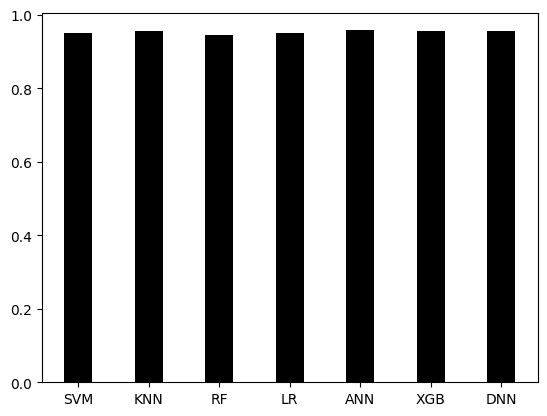

In [ ]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [ ]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

label = ["ArtificialNeuralNetwork", 'DeepNeuralNetwork',
         'KNearestNeighborsClassifier', 'LogisticRegression',
         'RandomForestClassifier', 'SupportVectorClassifier',
         'XGBoost', type(best_model).__name__, type(sbest_model).__name__ ]

acc = pd.DataFrame(
    {
    "ANN":[ATr,ATe],
    "DNN":[DTr,DTe],
    "KNN":[KTr,KTe],
    "LR" :[LTr,LTe],
    "RF" :[RTr,RTe],
    "SVM":[STr,STe],
    "XGB":[XTr,XTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test"]
acc = acc.T
acc['Model'] = label

acc = acc[['Model', 'train', 'test']]
acc['avg'] = round((acc['train'] + acc['test'])/2, 6)
acc[acc["avg"] == acc["avg"].max()]
acc['BestModel'] = 0
for i in range(len(acc)):
  if acc['avg'][i] >= 90 and acc['avg'][i] < acc['avg'].max():
    acc.iloc[i,-1] = "good"
  elif acc['avg'][i] == acc['avg'].max():
    acc.iloc[i,-1] = "best"
  else:
    acc.iloc[i,-1] = "not good"

acc["Precision"] = np.zeros(len(acc))
acc["Recall"]    = np.zeros(len(acc))
acc["F1_Score"]  = np.zeros(len(acc))



In [ ]:
y_pred_ANNn = []
y_pred_DNNn = []
for i in range(len(y_pred_ANN)):
  y_pred_ANNn.append(y_pred_ANN[i][0])
  y_pred_DNNn.append(y_pred_DNN[i][0])

In [ ]:
pred = [np.array(y_pred_ANNn), np.array(y_pred_DNNn), y_pred_knn,
        y_pred_lr, y_pred_rf,
        y_pred_svm, y_pred_xgb, y_pred_h2o, y_pred_sh2o]

tes  = [y_test_indi_ML, np.array(Dy_test), y_test_indi_ML, y_test_indi_ML,
        y_test_indi_ML, y_test_indi_ML, y_test_indi_ML,
        y_test_h2o.copy(), y_test_sh2o.copy()]

In [ ]:
np.array(y_pred_ANNn)

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
for i in range(len(pred)):
  p,r,f,_ = precision_recall_fscore_support(tes[i], pred[i],average='macro')
  acc.iloc[i,5]= p
  acc.iloc[i,6]= r
  acc.iloc[i,7]= f
  p = 0
  r = 0
  f = 0
  print(i)
acc

0
1
2
3
4
5
6
7
8


,Model,train,test,avg,BestModel,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.957625,0.9515,0.954562,not good,0.950317,0.946187,0.948169
DNN,DeepNeuralNetwork,0.954750,0.9515,0.953125,not good,0.949153,0.947491,0.948308
KNN,KNearestNeighborsClassifier,0.954875,0.9445,0.949688,not good,0.945655,0.935873,0.940325
LR,LogisticRegression,0.950000,0.9500,0.950000,not good,0.946807,0.946807,0.946807
RF,RandomForestClassifier,0.943875,0.9505,0.947188,not good,0.949487,0.944863,0.947072
SVM,SupportVectorClassifier,0.950500,0.9500,0.950250,not good,0.947226,0.946286,0.946751
XGB,XGBoost,0.956875,0.9410,0.948938,not good,0.938046,0.936190,0.937100
H_OD,H2ORandomForestEstimator,1.000000,0.9530,0.976500,best,0.947959,0.952866,0.950277
H_SOD,H2OXGBoostEstimator,0.951000,0.9495,0.950250,not good,0.947239,0.945102,0.946148


<BarContainer object of 9 artists>

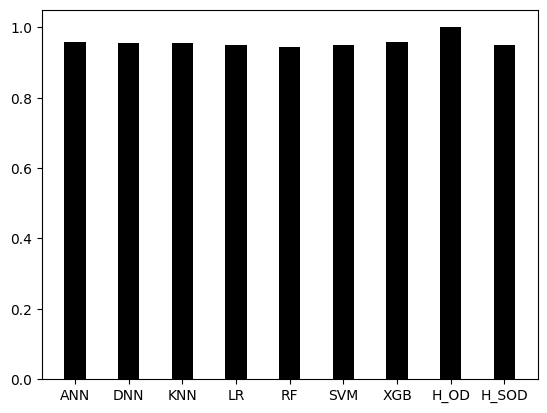

In [ ]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

In [ ]:
#encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()

In [ ]:
from sklearn import metrics

63/63 [==============================] - 0s 3ms/step
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


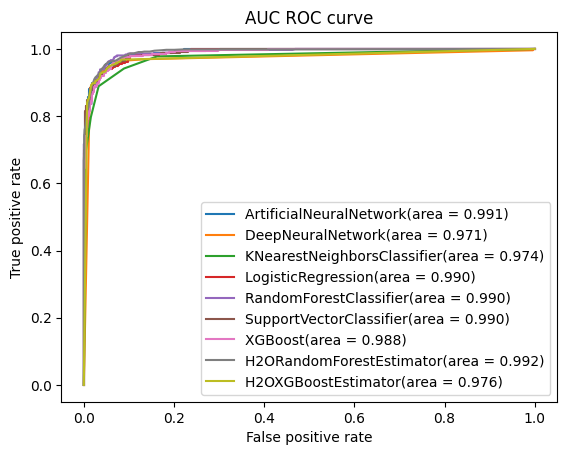

In [ ]:
plt.figure(1)
plt.rcParams["figure.figsize"] = [10, 5]

y_pred = ANNmodel.predict(X_test).ravel()
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[0]) + '(area = {:.3f})'.format(auc))

y_pred = model.predict(DX_test).ravel()
y_test = Dy_test.copy()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[1]) + '(area = {:.3f})'.format(auc))

y_pred = knn.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[2]) + '(area = {:.3f})'.format(auc))

y_pred = lr.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[3]) + '(area = {:.3f})'.format(auc))

y_pred = rf.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[4]) + '(area = {:.3f})'.format(auc))

y_pred = svm.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[5]) + '(area = {:.3f})'.format(auc))

y_pred = xgb.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[6]) + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(best_model.predict(valid)))
y_test = h2o.as_list(valid['diagnosis'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(best_model).__name__ + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))
y_test = h2o.as_list(svalid['y_test'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(sbest_model).__name__ + '(area = {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
tm = [aend,dend,kend,lend,rend,send,xend,autoend,sautoend]

In [ ]:
acc['time'] = 0#tm
acc

,Model,train,test,avg,BestModel,Precision,Recall,F1_Score,time
ANN,ArtificialNeuralNetwork,0.957625,0.9515,0.954562,not good,0.950317,0.946187,0.948169,0
DNN,DeepNeuralNetwork,0.954750,0.9515,0.953125,not good,0.949153,0.947491,0.948308,0
KNN,KNearestNeighborsClassifier,0.954875,0.9445,0.949688,not good,0.945655,0.935873,0.940325,0
LR,LogisticRegression,0.950000,0.9500,0.950000,not good,0.946807,0.946807,0.946807,0
RF,RandomForestClassifier,0.943875,0.9505,0.947188,not good,0.949487,0.944863,0.947072,0
SVM,SupportVectorClassifier,0.950500,0.9500,0.950250,not good,0.947226,0.946286,0.946751,0
XGB,XGBoost,0.956875,0.9410,0.948938,not good,0.938046,0.936190,0.937100,0
H_OD,H2ORandomForestEstimator,1.000000,0.9530,0.976500,best,0.947959,0.952866,0.950277,0
H_SOD,H2OXGBoostEstimator,0.951000,0.9495,0.950250,not good,0.947239,0.945102,0.946148,0


In [ ]:
acc['time'] = tm

In [ ]:
acc

,Model,train,test,avg,BestModel,Precision,Recall,F1_Score,time
ANN,ArtificialNeuralNetwork,0.957625,0.9515,0.954562,not good,0.950317,0.946187,0.948169,6.243280
DNN,DeepNeuralNetwork,0.954750,0.9515,0.953125,not good,0.949153,0.947491,0.948308,203.734524
KNN,KNearestNeighborsClassifier,0.954875,0.9445,0.949688,not good,0.945655,0.935873,0.940325,0.002470
LR,LogisticRegression,0.950000,0.9500,0.950000,not good,0.946807,0.946807,0.946807,0.054387
RF,RandomForestClassifier,0.943875,0.9505,0.947188,not good,0.949487,0.944863,0.947072,1.240527
SVM,SupportVectorClassifier,0.950500,0.9500,0.950250,not good,0.947226,0.946286,0.946751,7.244547
XGB,XGBoost,0.956875,0.9410,0.948938,not good,0.938046,0.936190,0.937100,13.642071
H_OD,H2ORandomForestEstimator,1.000000,0.9530,0.976500,best,0.947959,0.952866,0.950277,343.929040
H_SOD,H2OXGBoostEstimator,0.951000,0.9495,0.950250,not good,0.947239,0.945102,0.946148,93.816365
